# Phase Estimation from the box

There are 2 classes in qiskit to run phase estimation. One is `PhaseEstimation` from `qiskit.circuit.library`.

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import HGate
import matplotlib.pyplot as plt

from qiskit.circuit.library import PhaseEstimation

### Let's prepare a weird gate combination with strange phase.

Both is matrix and in gate form.

**TODO**. I did it gate form, can you do this in `numpy`?

In [8]:
GATESIZE = 2
strange_circuit = QuantumCircuit(GATESIZE)

# reverse qubit order ! 
# also, reverse in the end when measure.
strange_circuit.h(1)
strange_circuit.cx(1, 0)

import numpy as np
H = np.array([[1, 1], [1, -1]], dtype=complex) * (.5 ** .5)
I = np.eye(2)
CX = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])

G = ## TODO YOUR LINE IS HERE. Desired result is given

evals, evecs = np.linalg.eig(G)
print("Evals:", *np.round_(evals, 2))
print(np.round_(evecs, 4))
print()

# we will run the method for this particular vector.
WHICH_VECTOR = 2

vector = evecs[:, WHICH_VECTOR]
print("Eigenvalue", evals[WHICH_VECTOR])
print("Eigenvector", np.round_(vector, 4))

Evals: (-1+0j) (0.71+0.71j) (0.71-0.71j) (1+0j)
[[-0.2706-0.j  -0.    +0.5j -0.    -0.5j  0.6533+0.j ]
 [-0.2706-0.j   0.    -0.5j  0.    +0.5j  0.6533+0.j ]
 [ 0.6533+0.j  -0.5   -0.j  -0.5   +0.j   0.2706+0.j ]
 [ 0.6533+0.j   0.5   +0.j   0.5   +0.j   0.2706+0.j ]]

Eigenvalue (0.7071067811865474-0.7071067811865472j)
Eigenvector [-0. -0.5j  0. +0.5j -0.5+0.j   0.5+0.j ]


### Here is the prepared circuit for QPE

[Docs are here](https://qiskit.org/documentation/stubs/qiskit.circuit.library.PhaseEstimation.html#).

In [10]:
# number of qubits for measurements
PRECISION = 7
qpe = PhaseEstimation(PRECISION, strange_circuit)
print(qpe.draw())

        ┌──────┐
eval_0: ┤0     ├
        │      │
eval_1: ┤1     ├
        │      │
eval_2: ┤2     ├
        │      │
eval_3: ┤3     ├
        │      │
eval_4: ┤4 QPE ├
        │      │
eval_5: ┤5     ├
        │      │
eval_6: ┤6     ├
        │      │
   q_0: ┤7     ├
        │      │
   q_1: ┤8     ├
        └──────┘


QPE is a circuit. Thus you can append it to your circuit if you want.

**TODO:**
1. Initialize last 2 qubits with an eigenvector `vector`.
2. Append QPE circuit.
3. Measure precision qubits. **NB: they will be given in reverse order, thus you will obsever a reversed number.**

In [11]:
qc = QuantumCircuit(PRECISION + GATESIZE, PRECISION)

# TODO your 3 lines here!

print(qc.draw())

                                         ┌──────┐┌─┐                  
q_0: ────────────────────────────────────┤0     ├┤M├──────────────────
                                         │      │└╥┘┌─┐               
q_1: ────────────────────────────────────┤1     ├─╫─┤M├───────────────
                                         │      │ ║ └╥┘┌─┐            
q_2: ────────────────────────────────────┤2     ├─╫──╫─┤M├────────────
                                         │      │ ║  ║ └╥┘┌─┐         
q_3: ────────────────────────────────────┤3     ├─╫──╫──╫─┤M├─────────
                                         │      │ ║  ║  ║ └╥┘┌─┐      
q_4: ────────────────────────────────────┤4 QPE ├─╫──╫──╫──╫─┤M├──────
                                         │      │ ║  ║  ║  ║ └╥┘┌─┐   
q_5: ────────────────────────────────────┤5     ├─╫──╫──╫──╫──╫─┤M├───
                                         │      │ ║  ║  ║  ║  ║ └╥┘┌─┐
q_6: ────────────────────────────────────┤6     ├─╫──╫──╫──╫──╫──╫─┤M├
     ┌

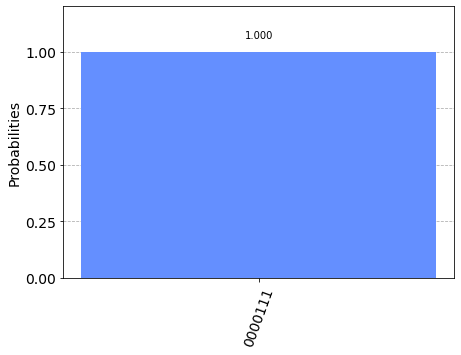

In [12]:
shots = 1000
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=shots)
counts = job.result().get_counts(qc)
plot_histogram(counts)

Lasts steps are here.

I extracted the most probable measurement for you.
TODO:
1. Convert `measurement` into an `angle`, rememering, that $2\pi$ is split into $2^{PRECISION}$ sectors.
2. Convert an `angle` to an `eigenvalue`. Angle is just an [argument of a complex number](https://en.wikipedia.org/wiki/Argument_(complex_analysis)).

In [13]:
from math import pi
print(sorted(list(counts.items()), key=lambda x: x[1]))
measurement = int(sorted(list(counts.items()), key=lambda x: x[1])[-1][0][::-1], base=2)
print("Measured: ", measurement)
angle = ## YOUR CODE HERE
print("Angle: ", angle)
eigenvalue = ## YOUR CODE HERE

print("Computed: ", eigenvalue)
print("Expected: ", evals[WHICH_VECTOR])

[('0000111', 1000)]
Measured:  112
Angle:  5.497787143782138
Computed:  (0.7071067811865474-0.7071067811865477j)
Expected:  (0.7071067811865474-0.7071067811865472j)


## Another implementation is

But it is depricated :)

In [14]:
from qiskit.aqua.algorithms import QPE

C:\anaconda\envs\qiskit\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
